<a href="https://colab.research.google.com/github/vamsigp/EIP-4/blob/master/wk_3/S3_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.layers import SeparableConv2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

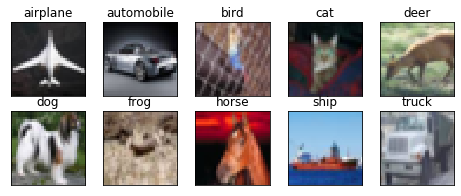

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### Base Model

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.





Epoch 1/50





390/390 [==============================] - 24s 61ms/step - loss: 1.8854 - acc: 0.2756 - val_loss: 1.4719 - val_acc: 0.4532
Epoch 2/50
390/390 [==============================] - 20s 52ms/step - loss: 1.3858 - acc: 0.4957 - val_loss: 1.1508 - val_acc: 0.5806
Epoch 3/50
390/390 [==============================] - 20s 52ms/step - loss: 1.1683 - acc: 0.5839 - val_loss: 0.9993 - val_acc: 0.6484
Epoch 4/50
390/390 [==============================] - 20s 52ms/step - loss: 1.0376 - acc: 0.6390 - val_loss: 0.8863 - val_acc: 0.6881
Epoch 5/50
390/390 [==============================] - 21s 53ms/step - loss: 0.9261 - acc: 0.6802 - val_loss: 0.8312 - val_acc: 0.7105
Epoch 6/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8564 - acc: 0.7062 - val_loss: 0.7604 - val_acc: 0.7410
Epoch 7/50
390/390 [==============================] - 20s 52ms/step - loss: 0.7942 - acc: 0.7281 - val_loss: 0.7273 - val_acc: 0.7553
Epoch 8/50
390/390 [==============================] - 

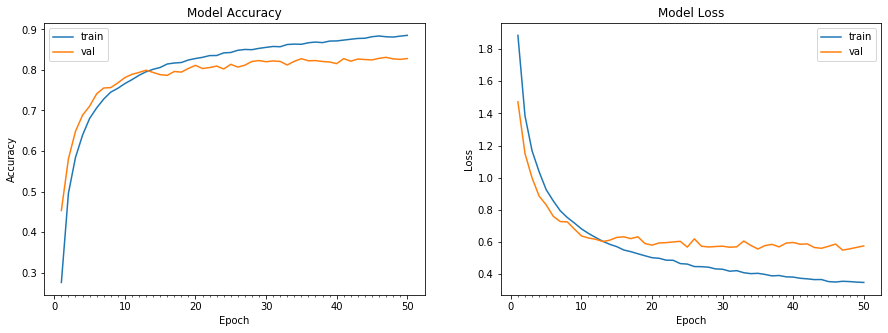

Accuracy on test data is: 82.78


In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
def train_model(current_model):
  datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


  # train the model
  start = time.time()
  # Train the model
  current_model_info = current_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                  samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                  validation_data = (test_features, test_labels), verbose=1)
  end = time.time()
  print ("Model took %0.2f seconds to train"%(end - start))
  # plot model history
  plot_model_history(current_model_info)
  # compute test accuracy
  print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, current_model))

In [0]:
def train_modelWithScheduler(current_model):
  datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


  # train the model
  start = time.time()
  # Train the model
  current_model_info = current_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                  samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                validation_data = (test_features, test_labels),callbacks=[LearningRateScheduler(scheduler, verbose=1)],
                                   verbose=1)
  end = time.time()
  print ("Model took %0.2f seconds to train"%(end - start))
  # plot model history
  plot_model_history(current_model_info)
  # compute test accuracy
  print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, current_model))

In [0]:
def trainModelWithCallbacks(current_model, myCallbacks):
  datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


  # train the model
  start = time.time()
  # Train the model
  current_model_info = current_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                  samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                validation_data = (test_features, test_labels),callbacks=[myCallbacks],
                                   verbose=1)
  end = time.time()
  print ("Model took %0.2f seconds to train"%(end - start))
  # plot model history
  plot_model_history(current_model_info)
  # compute test accuracy
  print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, current_model))  

### Assignment

1. it uses depthwise separable convolution ONLY (no Conv2D)
2. it uses BatchNormalization 
3. < 100000 parameters
4. Proper dropout values
5. Mention for each layer

    a. Receptive Field

    b. Indented block

    c. output size
6. runs for 50 epochs
7. Beat the base model accuracy which is 82.78%



### Final Notes

As per the latest run - 
* __Base Model Accuracy = 82.78%__

* Final Accuracy
1. __Model With Image Augmentation (Model name = m9)__

> Max Accuracy = 84.65% at epoch 47

> Final Epoch Accuracy = 84.09%

2. __Model without Image Augmentation (Model name = m8)__

> Maximum Accuracy = 83.29% at Epoch 38

> Final Epoch Accuracy = 83.10%

Total Number of Parameters
* Total params: 86,965
* Trainable params: 85,621
* Non-trainable params: 1,344 




In [0]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode= 'min', patience=4, min_lr=0.0001, verbose=1)

### Trail - 9 / ImageAugmentation

Trail - 8 with Image Augmentaion

In [0]:
def trainModelWithCallbacksAndImageAugmentation(current_model, myCallbacks):
  datagen = ImageDataGenerator(shear_range=0.2,
                               zoom_range=0.0, 
                               rotation_range=20,                               
                               horizontal_flip=True)


  # train the model
  start = time.time()
  # Train the model
  current_model_info = current_model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                  samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                validation_data = (test_features, test_labels),callbacks=[myCallbacks],
                                   verbose=1)
  end = time.time()
  print ("Model took %0.2f seconds to train"%(end - start))
  # plot model history
  plot_model_history(current_model_info)
  # compute test accuracy
  print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, current_model))  

In [0]:
m9 = Sequential()

# Block 1
m9.add(SeparableConv2D(filters=48, kernel_size=(3,3),padding='same', input_shape=(32, 32, 3))) # 32
m9.add(BatchNormalization())
m9.add(Activation('relu'))
m9.add(SeparableConv2D(filters=48, kernel_size=(3,3))) # 30
m9.add(BatchNormalization())
m9.add(Activation('relu'))
m9.add(MaxPooling2D(pool_size=2)) #15
m9.add(Dropout(0.1))

# Block 2
m9.add(SeparableConv2D(filters=96, kernel_size=(3,3),padding='same')) # 15
m9.add(BatchNormalization())
m9.add(Activation('relu'))
m9.add(SeparableConv2D(filters=96, kernel_size=(3,3))) # 13 
m9.add(BatchNormalization())
m9.add(Activation('relu'))
m9.add(MaxPooling2D(pool_size=2)) # 6
m9.add(Dropout(0.1))

# block 3
m9.add(SeparableConv2D(filters=192, kernel_size=(3, 3),padding='same')) #6
m9.add(Activation('relu'))
m9.add(BatchNormalization())
m9.add(SeparableConv2D(filters=192, kernel_size=(3, 3))) #4
m9.add(Activation('relu'))
m9.add(BatchNormalization())
m9.add(MaxPooling2D(pool_size=(2, 2))) #2
m9.add(Dropout(0.1))

# check if the below can be done using SeperableConv@D
m9.add(Convolution2D(num_classes, 2))

m9.add(GlobalAveragePooling2D())
m9.add(Activation('softmax'))

m9.compile(optimizer=Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy']) 

In [0]:
m9.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`
  


Epoch 1/50
390/390 [==============================] - 40s 103ms/step - loss: 1.5574 - acc: 0.4643 - val_loss: 3.5387 - val_acc: 0.2538
Epoch 2/50
390/390 [==============================] - 38s 96ms/step - loss: 1.1469 - acc: 0.5959 - val_loss: 2.0441 - val_acc: 0.3855
Epoch 3/50
390/390 [==============================] - 38s 97ms/step - loss: 0.9830 - acc: 0.6525 - val_loss: 1.3689 - val_acc: 0.5541
Epoch 4/50
390/390 [==============================] - 38s 97ms/step - loss: 0.8999 - acc: 0.6860 - val_loss: 1.2099 - val_acc: 0.5980
Epoch 5/50
390/390 [==============================] - 38s 96ms/step - loss: 0.8379 - acc: 0.7044 - val_loss: 1.1146 - val_acc: 0.6549
Epoch 6/50
390/390 [==============================] - 38s 96ms/step - loss: 0.7893 - acc: 0.7244 - val_loss: 1.3463 - val_acc: 0.6083
Epoch 7/50
390/390 [==============================] - 38s 96ms/step - loss: 0.7558 - acc: 0.7361 - val_loss: 0.9030 - val_acc: 0.6894
Epoch 8/50
390/390 [==============================] - 37s 96m

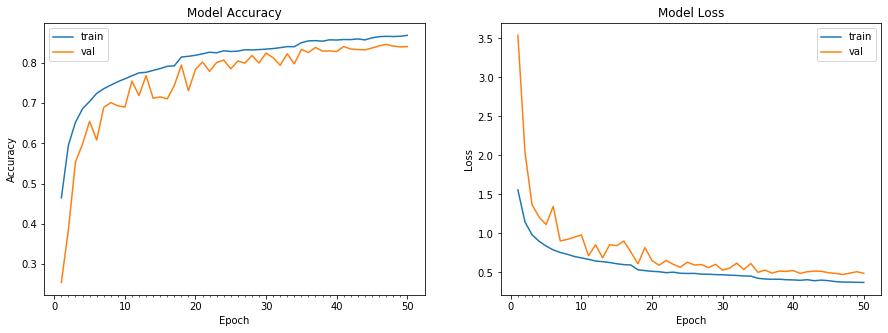

Accuracy on test data is: 84.09


In [0]:
trainModelWithCallbacksAndImageAugmentation(m9, reduce_lr)

### Trail - 8 / Finale Model

FRom the Trail-7, at the end of 50th epoch we can see the accuracy is hitting 82%, if we can run for few more iterations it may reach to base model accuracy.

Also, we need to observe the Learning rate is decreasing very slowly. My intuition is as the LR is very low, its not achieving the convergence. Lets apply minimum LR by use of ReduceLROnPlateau callback.

In [0]:
m8 = Sequential()

# Block 1
m8.add(SeparableConv2D(filters=48, kernel_size=(3,3),padding='same', input_shape=(32, 32, 3))) # 32
m8.add(BatchNormalization())
m8.add(Activation('relu'))
m8.add(SeparableConv2D(filters=48, kernel_size=(3,3))) # 30
m8.add(BatchNormalization())
m8.add(Activation('relu'))
m8.add(MaxPooling2D(pool_size=2)) #15
m8.add(Dropout(0.1))

# Block 2
m8.add(SeparableConv2D(filters=96, kernel_size=(3,3),padding='same')) # 15
m8.add(BatchNormalization())
m8.add(Activation('relu'))
m8.add(SeparableConv2D(filters=96, kernel_size=(3,3))) # 13 
m8.add(BatchNormalization())
m8.add(Activation('relu'))
m8.add(MaxPooling2D(pool_size=2)) # 6
m8.add(Dropout(0.1))

# block 3
m8.add(SeparableConv2D(filters=192, kernel_size=(3, 3),padding='same')) #6
m8.add(Activation('relu'))
m8.add(BatchNormalization())
m8.add(SeparableConv2D(filters=192, kernel_size=(3, 3))) #4
m8.add(Activation('relu'))
m8.add(BatchNormalization())
m8.add(MaxPooling2D(pool_size=(2, 2))) #2
m8.add(Dropout(0.1))

# check if the below can be done using SeperableConv@D
m8.add(Convolution2D(num_classes, 2))

m8.add(GlobalAveragePooling2D())
m8.add(Activation('softmax'))

m8.compile(optimizer=Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy']) 

In [0]:
m8.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_7 (Separabl (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_8 (Separabl (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_8 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
activation_17 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 31s 79ms/step - loss: 1.5299 - acc: 0.4704 - val_loss: 1.8165 - val_acc: 0.4332
Epoch 2/50
390/390 [==============================] - 29s 74ms/step - loss: 1.0596 - acc: 0.6278 - val_loss: 1.2595 - val_acc: 0.5934
Epoch 3/50
390/390 [==============================] - 28s 73ms/step - loss: 0.8848 - acc: 0.6912 - val_loss: 1.6568 - val_acc: 0.4630
Epoch 4/50
390/390 [==============================] - 29s 74ms/step - loss: 0.7753 - acc: 0.7296 - val_loss: 1.3992 - val_acc: 0.5656
Epoch 5/50
390/390 [==============================] - 28s 73ms/step - loss: 0.7079 - acc: 0.7536 - val_loss: 0.9889 - val_acc: 0.6750
Epoch 6/50
390/390 [==============================] - 29s 73ms/step - loss: 0.6543 - acc: 0.7705 - val_loss: 0.9286 - val_acc: 0.7013
Epoch 7/50
390/390 [==============================] - 29s 73ms/step - loss: 0.6153 - acc: 0.7864 - val_loss: 0.9394 - val_acc: 0.6817
Epoch 8/50
390/390 [==============================] - 29s 74ms

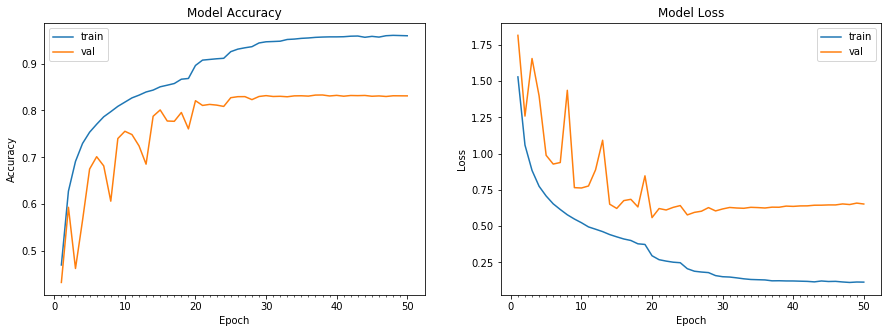

Accuracy on test data is: 83.10


In [0]:
trainModelWithCallbacks(m8, reduce_lr)

### Trail - 7

In [0]:
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.32 * epoch), 10)

In [0]:
m7 = Sequential()

# Block 1
m7.add(SeparableConv2D(filters=48, kernel_size=(3,3),padding='same', input_shape=(32, 32, 3))) # 32
m7.add(BatchNormalization())
m7.add(Activation('relu'))
m7.add(SeparableConv2D(filters=48, kernel_size=(3,3))) # 30
m7.add(BatchNormalization())
m7.add(Activation('relu'))
m7.add(MaxPooling2D(pool_size=2)) #15
m7.add(Dropout(0.25))

# Block 2
m7.add(SeparableConv2D(filters=96, kernel_size=(3,3),padding='same')) # 15
m7.add(BatchNormalization())
m7.add(Activation('relu'))
m7.add(SeparableConv2D(filters=96, kernel_size=(3,3))) # 13 
m7.add(BatchNormalization())
m7.add(Activation('relu'))
m7.add(MaxPooling2D(pool_size=2)) # 6
m7.add(Dropout(0.25))

# block 3
m7.add(SeparableConv2D(filters=192, kernel_size=(3, 3),padding='same')) #6
m7.add(Activation('relu'))
m7.add(BatchNormalization())
m7.add(SeparableConv2D(filters=192, kernel_size=(3, 3))) #4
m7.add(Activation('relu'))
m7.add(BatchNormalization())
m7.add(MaxPooling2D(pool_size=(2, 2))) #2
m7.add(Dropout(0.25))

# check if the below can be done using SeperableConv@D
m7.add(Convolution2D(num_classes, 2))

m7.add(GlobalAveragePooling2D())
m7.add(Activation('softmax'))

m7.compile(optimizer=Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy']) 

In [0]:
m7.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_13 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_14 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_14 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_24 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 32s 83ms/step - loss: 1.6387 - acc: 0.4456 - val_loss: 2.5449 - val_acc: 0.3069
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022727273.
390/390 [==============================] - 28s 71ms/step - loss: 1.0828 - acc: 0.6174 - val_loss: 1.1795 - val_acc: 0.5984
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018292683.
390/390 [==============================] - 28s 72ms/step - loss: 0.9214 - acc: 0.6750 - val_loss: 1.9310 - val_acc: 0.4671
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015306122.
390/390 [==============================] - 28s 72ms/step - loss: 0.8340 - acc: 0.7081 - val_loss: 0.9264 - val_acc: 0.6791
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013157895.
390/390 [==============================] - 28s 72ms/step - loss: 0.7749 - acc: 0.7261

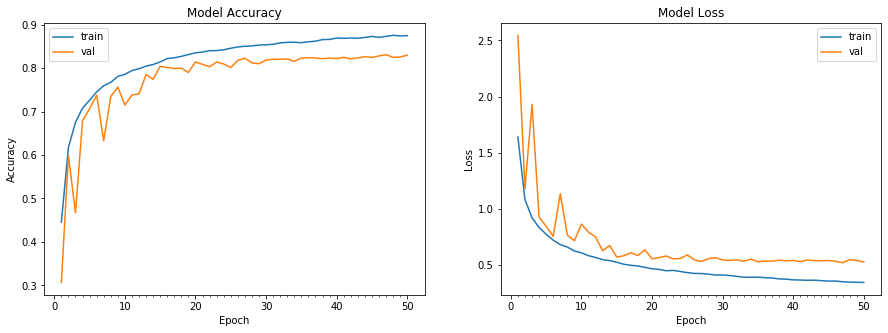

Accuracy on test data is: 82.96


In [0]:
train_modelWithScheduler(m7)

### Trail - 5
Trail- 3 with lower drop out values

In [0]:
m5 = Sequential()

# Block 1
m5.add(SeparableConv2D(filters=48, kernel_size=(3,3),padding='same', input_shape=(32, 32, 3))) # 32
m5.add(BatchNormalization())
m5.add(Activation('relu'))
m5.add(SeparableConv2D(filters=48, kernel_size=(3,3))) # 30
m5.add(BatchNormalization())
m5.add(Activation('relu'))
m5.add(MaxPooling2D(pool_size=2)) #15
m5.add(Dropout(0.25))

# Block 2
m5.add(SeparableConv2D(filters=96, kernel_size=(3,3),padding='same')) # 15
m5.add(BatchNormalization())
m5.add(Activation('relu'))
m5.add(SeparableConv2D(filters=96, kernel_size=(3,3))) # 13 
m5.add(BatchNormalization())
m5.add(Activation('relu'))
m5.add(MaxPooling2D(pool_size=2)) # 6
m5.add(Dropout(0.25))

# block 3
m5.add(SeparableConv2D(filters=192, kernel_size=(3, 3),padding='same')) #6
m5.add(Activation('relu'))
m5.add(BatchNormalization())
m5.add(SeparableConv2D(filters=192, kernel_size=(3, 3))) #4
m5.add(Activation('relu'))
m5.add(BatchNormalization())
m5.add(MaxPooling2D(pool_size=(2, 2))) #2
m5.add(Dropout(0.25))

# check if the below can be done using SeperableConv@D
m5.add(Convolution2D(num_classes, 2))

m5.add(GlobalAveragePooling2D())
m5.add(Activation('softmax'))

# m2.add(Flatten())
# m2.add(Dense(512))
# m2.add(Activation('relu'))
# m2.add(Dropout(0.5))
# m2.add(Dense(256))
# m2.add(Activation('relu'))
# m2.add(Dropout(0.5))

# m2.add(Dense(num_classes, activation='softmax'))

m5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
m5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_19 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_20 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_20 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_31 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
390/390 [==============================] - 32s 83ms/step - loss: 1.7905 - acc: 0.3982 - val_loss: 1.2724 - val_acc: 0.5448
Epoch 2/50
390/390 [==============================] - 28s 72ms/step - loss: 1.2677 - acc: 0.5520 - val_loss: 1.0786 - val_acc: 0.6138
Epoch 3/50
390/390 [==============================] - 28s 72ms/step - loss: 1.0875 - acc: 0.6164 - val_loss: 1.4053 - val_acc: 0.5057
Epoch 4/50
390/390 [==============================] - 28s 71ms/step - loss: 0.9785 - acc: 0.6547 - val_loss: 1.4965 - val_acc: 0.4966
Epoch 5/50
390/390 [==============================] - 28s 71ms/step - loss: 0.9045 - acc: 0.6821 - val_loss: 1.2481 - val_acc: 0.5963
Epoch 6/50
390/390 [==============================] - 28s 71ms/step - loss: 0.8475 - acc: 0.7036 - val_loss: 1.1421 - val_acc: 0.6075
Epoch 7/50
390/390 [==============================] - 28s 71ms/step - loss: 0.7946 - acc: 0.7219 - val_loss: 1.3179 - val_acc: 0.5852
Epoch 8/50
390/390 [==============================] - 28s 72ms

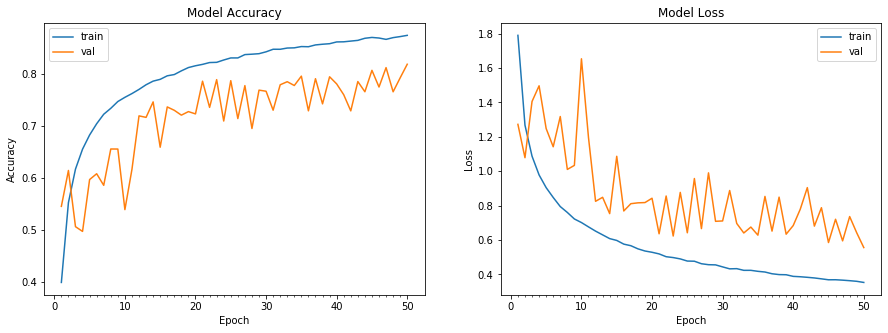

Accuracy on test data is: 81.81


In [0]:
train_model(m5)

### Trail - 4
Trail 2 and Trail 3 didnt reach the base network accuracy; 
Lets tweak the architecture number of filters and add more layers based on Trail-3

In [0]:
m4 = Sequential()

# Block 1
m4.add(SeparableConv2D(filters=32, kernel_size=(3,3),padding='same', activation='relu', input_shape=(32, 32, 3))) # 32
m4.add(BatchNormalization())
m4.add(SeparableConv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')) # 32
m4.add(BatchNormalization())
m4.add(SeparableConv2D(filters=128, kernel_size=(3,3), activation='relu')) # 30
m4.add(BatchNormalization())
m4.add(MaxPooling2D(pool_size=2)) #15
m4.add(Dropout(0.1))

# Block 2
m4.add(SeparableConv2D(filters=32, kernel_size=(3,3),padding='same', activation='relu')) # 15
m4.add(BatchNormalization())
m4.add(SeparableConv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')) # 15
m4.add(BatchNormalization())
m4.add(SeparableConv2D(filters=128, kernel_size=(3,3), activation='relu')) # 13
m4.add(BatchNormalization())
m4.add(MaxPooling2D(pool_size=2)) # 6
m4.add(Dropout(0.1))

# block 3
m4.add(SeparableConv2D(filters=32, kernel_size=(3, 3),padding='same', activation='relu')) #6
m4.add(BatchNormalization())
m4.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')) #6
m4.add(BatchNormalization())
m4.add(SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu')) #4
m4.add(BatchNormalization())
m4.add(MaxPooling2D(pool_size=(2, 2))) #2
m4.add(Dropout(0.1))

# check if the below can be done using SeperableConv@D
m4.add(Convolution2D(num_classes, 2))

m4.add(GlobalAveragePooling2D())
m4.add(Activation('softmax'))

m4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
m4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_25 (Separab (None, 32, 32, 32)        155       
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
separable_conv2d_26 (Separab (None, 32, 32, 64)        2400      
_________________________________________________________________
batch_normalization_26 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
separable_conv2d_27 (Separab (None, 30, 30, 128)       8896      
_________________________________________________________________
batch_normalization_27 (Batc (None, 30, 30, 128)       512       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 128)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
390/390 [==============================] - 46s 118ms/step - loss: 1.7833 - acc: 0.3856 - val_loss: 1.4558 - val_acc: 0.4917
Epoch 2/50
390/390 [==============================] - 39s 100ms/step - loss: 1.2272 - acc: 0.5624 - val_loss: 1.3128 - val_acc: 0.5564
Epoch 3/50
390/390 [==============================] - 39s 101ms/step - loss: 1.0361 - acc: 0.6311 - val_loss: 1.0523 - val_acc: 0.6355
Epoch 4/50
390/390 [==============================] - 39s 101ms/step - loss: 0.9191 - acc: 0.6756 - val_loss: 0.8846 - val_acc: 0.6862
Epoch 5/50
390/390 [==============================] - 39s 101ms/step - loss: 0.8341 - acc: 0.7036 - val_loss: 0.8767 - val_acc: 0.6925
Epoch 6/50
390/390 [==============================] - 39s 101ms/step - loss: 0.7706 - acc: 0.7281 - val_loss: 0.7923 - val_acc: 0.7251
Epoch 7/50
390/390 [==============================] - 39s 101ms/step - loss: 0.7198 - acc: 0.7460 - val_loss: 0.8560 - val_acc: 0.7030
Epoch 8/50
390/390 [==============================] - 3

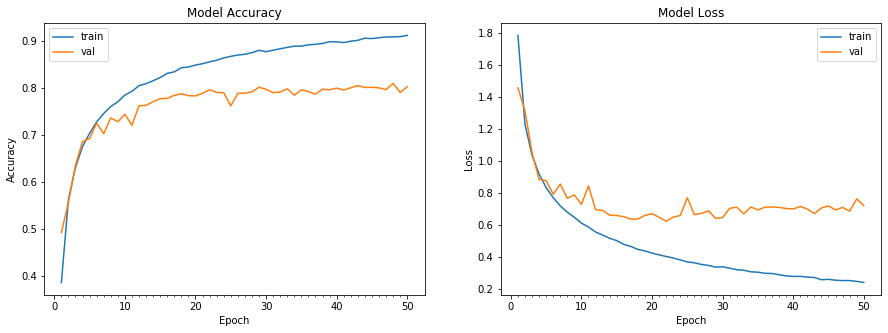

Accuracy on test data is: 80.28


In [0]:
train_model(m4)

### Trail - 3

In [0]:
m3 = Sequential()

# Block 1
m3.add(SeparableConv2D(filters=48, kernel_size=(3,3),padding='same', input_shape=(32, 32, 3))) # 32
m3.add(BatchNormalization())
m3.add(Activation('relu'))
m3.add(SeparableConv2D(filters=48, kernel_size=(3,3))) # 30
m3.add(BatchNormalization())
m3.add(Activation('relu'))
m3.add(MaxPooling2D(pool_size=2)) #15
m3.add(Dropout(0.25))

# Block 2
m3.add(SeparableConv2D(filters=96, kernel_size=(3,3),padding='same')) # 15
m3.add(BatchNormalization())
m3.add(Activation('relu'))
m3.add(SeparableConv2D(filters=96, kernel_size=(3,3))) # 13 
m3.add(BatchNormalization())
m3.add(Activation('relu'))
m3.add(MaxPooling2D(pool_size=2)) # 6
m3.add(Dropout(0.25))

# block 3
m3.add(SeparableConv2D(filters=192, kernel_size=(3, 3),padding='same')) #6
m3.add(Activation('relu'))
m3.add(BatchNormalization())
m3.add(SeparableConv2D(filters=192, kernel_size=(3, 3))) #4
m3.add(Activation('relu'))
m3.add(BatchNormalization())
m3.add(MaxPooling2D(pool_size=(2, 2))) #2
m3.add(Dropout(0.25))

# check if the below can be done using SeperableConv@D
m3.add(Convolution2D(num_classes, 2))

m3.add(GlobalAveragePooling2D())
m3.add(Activation('softmax'))

# m2.add(Flatten())
# m2.add(Dense(512))
# m2.add(Activation('relu'))
# m2.add(Dropout(0.5))
# m2.add(Dense(256))
# m2.add(Activation('relu'))
# m2.add(Dropout(0.5))

# m2.add(Dense(num_classes, activation='softmax'))

m3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
m3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_34 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_34 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_38 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_35 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_35 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_39 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
390/390 [==============================] - 34s 88ms/step - loss: 1.8237 - acc: 0.3895 - val_loss: 1.6718 - val_acc: 0.4401
Epoch 2/50
390/390 [==============================] - 28s 72ms/step - loss: 1.2997 - acc: 0.5415 - val_loss: 1.2685 - val_acc: 0.5685
Epoch 3/50
390/390 [==============================] - 28s 72ms/step - loss: 1.1148 - acc: 0.6049 - val_loss: 1.0462 - val_acc: 0.6280
Epoch 4/50
390/390 [==============================] - 28s 72ms/step - loss: 1.0023 - acc: 0.6467 - val_loss: 1.0450 - val_acc: 0.6357
Epoch 5/50
390/390 [==============================] - 28s 72ms/step - loss: 0.9159 - acc: 0.6757 - val_loss: 0.8842 - val_acc: 0.6916
Epoch 6/50
390/390 [==============================] - 28s 72ms/step - loss: 0.8535 - acc: 0.6965 - val_loss: 0.8448 - val_acc: 0.7070
Epoch 7/50
390/390 [==============================] - 28s 72ms/step - loss: 0.8063 - acc: 0.7159 - val_loss: 0.8173 - val_acc: 0.7178
Epoch 8/50
390/390 [==============================] - 28s 72ms

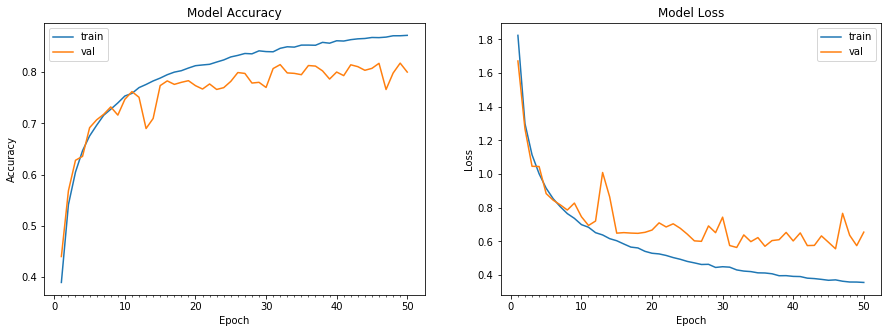

Accuracy on test data is: 80.02


In [0]:
train_model(m3)

### Trail - 2

Remove last layers of Dense and apply 1x1 conv

In [0]:
m2 = Sequential()

# Block 1
m2.add(SeparableConv2D(filters=48, kernel_size=(3,3),padding='same', input_shape=(32, 32, 3))) # 32
m2.add(BatchNormalization())
m2.add(Activation('relu'))
m2.add(SeparableConv2D(filters=48, kernel_size=(3,3))) # 30
m2.add(BatchNormalization())
m2.add(Activation('relu'))
m2.add(MaxPooling2D(pool_size=2)) #15
m2.add(Dropout(0.25))

# Block 2
m2.add(SeparableConv2D(filters=96, kernel_size=(3,3),padding='same')) # 15
m2.add(BatchNormalization())
m2.add(Activation('relu'))
m2.add(SeparableConv2D(filters=96, kernel_size=(3,3))) # 13 
m2.add(BatchNormalization())
m2.add(Activation('relu'))
m2.add(MaxPooling2D(pool_size=2)) # 6
m2.add(Dropout(0.25))

# block 3
m2.add(SeparableConv2D(filters=192, kernel_size=(3, 3),padding='same')) #6
m2.add(Activation('relu'))
m2.add(BatchNormalization())
m2.add(SeparableConv2D(filters=192, kernel_size=(3, 3))) #4
m2.add(Activation('relu'))
m2.add(BatchNormalization())
m2.add(MaxPooling2D(pool_size=(2, 2))) #2
m2.add(Dropout(0.25))

# check if the below can be done using SeperableConv@D
m2.add(Convolution2D(num_classes, 2))

m2.add(Flatten())
m2.add(Activation('softmax'))

# m2.add(Flatten())
# m2.add(Dense(512))
# m2.add(Activation('relu'))
# m2.add(Dropout(0.5))
# m2.add(Dense(256))
# m2.add(Activation('relu'))
# m2.add(Dropout(0.5))

# m2.add(Dense(num_classes, activation='softmax'))

m2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
m2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_40 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_40 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
activation_45 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_41 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_41 (Batc (None, 30, 30, 48)        192       
_________________________________________________________________
activation_46 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 48)       

In [0]:
train_model(m2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
390/390 [==============================] - 35s 90ms/step - loss: 1.8161 - acc: 0.3872 - val_loss: 1.4996 - val_acc: 0.4621
Epoch 2/50
390/390 [==============================] - 28s 73ms/step - loss: 1.2833 - acc: 0.5463 - val_loss: 1.3083 - val_acc: 0.5429
Epoch 3/50
390/390 [==============================] - 28s 73ms/step - loss: 1.0913 - acc: 0.6121 - val_loss: 1.2271 - val_acc: 0.5899
Epoch 4/50
390/390 [==============================] - 28s 73ms/step - loss: 0.9800 - acc: 0.6554 - val_loss: 0.9191 - val_acc: 0.6834
Epoch 5/50
390/390 [==============================] - 28s 72ms/step - loss: 0.8965 - acc: 0.6859 - val_loss: 0.9498 - val_acc: 0.6703
Epoch 6/50
390/390 [==============================] - 28s 72ms/step - loss: 0.8457 - acc: 0.7021 - val_loss: 0.9379 - val_acc: 0.6742
Epoch 7/50
390/390 [==============================] - 32s 81ms/step - loss: 0.7989 - acc: 0.7183 - val_loss: 0.9715 - val_acc: 0.6613
Epoch 8/50
390/390 [==============================] - 32s 82ms

KeyboardInterrupt: ignored

### Trail - 1

---
Model name = ***m1***



*   Architecture same as Base model architecture
*   Replacing Conv2D with SeperaableConv2D
* *Not changing dropout values*
-- Result Model Not learning

* Add Batch Normalization after convolution



---



In [0]:
m1 = Sequential()

# Block 1
m1.add(SeparableConv2D(filters=48, kernel_size=(3,3),padding='same', input_shape=(32, 32, 3))) # 30
m1.add(BatchNormalization())
m1.add(Activation('relu'))
m1.add(SeparableConv2D(filters=48, kernel_size=(3,3))) # 28
m1.add(BatchNormalization())
m1.add(Activation('relu'))
m1.add(MaxPooling2D(pool_size=2)) #14
m1.add(Dropout(0.25))

# Block 2
m1.add(SeparableConv2D(filters=96, kernel_size=(3,3),padding='same')) # 12
m1.add(BatchNormalization())
m1.add(Activation('relu'))
m1.add(SeparableConv2D(filters=96, kernel_size=(3,3))) # 10 
m1.add(BatchNormalization())
m1.add(Activation('relu'))
m1.add(MaxPooling2D(pool_size=2))
m1.add(Dropout(0.25))

# block 3
m1.add(SeparableConv2D(filters=192, kernel_size=(3, 3),padding='same'))
m1.add(Activation('relu'))
m1.add(BatchNormalization())
m1.add(SeparableConv2D(filters=192, kernel_size=(3, 3)))
m1.add(Activation('relu'))
m1.add(BatchNormalization())
m1.add(MaxPooling2D(pool_size=(2, 2)))
m1.add(Dropout(0.25))

m1.add(Flatten())
m1.add(Dense(512))
m1.add(Activation('relu'))
m1.add(Dropout(0.5))
m1.add(Dense(256))
m1.add(Activation('relu'))
m1.add(Dropout(0.5))
m1.add(Dense(num_classes, activation='softmax'))

m1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
m1.summary()

In [0]:
train_model(m1)